In [1]:
import sys
import pwreg as pw
import matplotlib.pyplot as plt
import numpy as np

import pickle
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/ply/anaconda3/envs/ants/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
project_path = "/mnt/d/Code/repos/UGPy"

In [3]:
fixed = pw.Image([0.658, 0.23, 0.23],
                 filename = f'{project_path}/data/changes/learners/1-23C4/crops/map_id_375xg1vd_ckpt_3m51q4ne_1-23E2_left_main.tif') # tp1
moving = pw.Image([0.658, 0.23, 0.23], 
                  filename = f'{project_path}/data/changes/learners/1-23C4/registered/crops/gadReg_map_id_375xg1vd_ckpt_3m51q4ne_1-23E4_to_1-23E2_left_main.tif') # tp 2

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


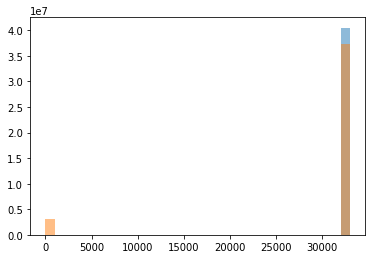

In [4]:
# We can set the number of bins with the *bins* keyword argument.
bins = np.arange(0, 34000, 1000)
plt.hist(fixed.img.flatten(), bins= bins, alpha = 0.5); 
plt.hist(moving.img.flatten(), bins= bins, alpha = 0.5);

In [18]:
np.max(fixed.img)

33763

In [19]:
np.max(moving.img[moving.img>0])

33760

In [22]:
fixed.img.dtype

dtype('<u2')

In [23]:
moving.img.dtype

dtype('uint16')

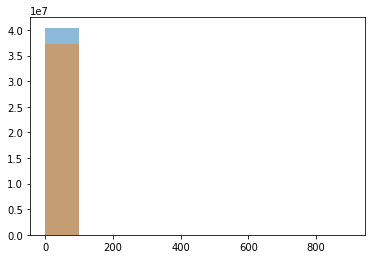

In [8]:
fixed_n = fixed.normalize(min_value = 32768)
moving_n = moving.normalize(min_value = 32768)

# We can set the number of bins with the *bins* keyword argument.
bins = np.arange(960, 980, 1)
plt.hist(fixed_n.img.flatten(), bins= bins, alpha = 0.5); 
plt.hist(moving_n.img.flatten(), bins= bins, alpha = 0.5);
# plt.ylim([0,1000])


In [16]:
np.max(fixed_n.img)

1000.0

In [17]:
np.max(moving_n.img)

33032.25806451613

In [ ]:

fixed.imwrite(f'{project_path}/data/changes/learners/1-23C4/crops/norm_map_id_375xg1vd_ckpt_3m51q4ne_1-23E2_left_main.tif')
moving.imwrite(f'{project_path}/data/changes/learners/1-23C4/registered/crops/norm_gadReg_map_id_375xg1vd_ckpt_3m51q4ne_1-23E4_to_1-23E2_left_main.tif')